## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [148]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [149]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [150]:
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)

In [151]:
# matched the lower case of the other dataset
happiness["country"] = happiness["country"].str.lower()

# renamed column name so pd.merge would work
happiness.rename(columns = {'country':'country_name'}, inplace = True)
happiness.head()

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [152]:
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [153]:
# merge command combines dataframes as long as there is a shared column
country_features = pd.merge(happiness, countries)
country_features.head()

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [154]:
# Write your code here
import numpy as np
happiness_df = country_features.sort_values(by=['happiness_score'], ascending=False)
happiness_df = happiness_df.reset_index()
happiness_df.head(10)





,index,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,38,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,"100,0"
1,31,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,"100,0"
2,115,switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,41290,7523934,"99,0"
3,50,iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,103000,299388,"99,9"
4,92,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,"100,0"
5,87,netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,41526,16491461,"99,0"
6,114,sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,449964,9016596,"99,0"
7,88,new zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,268680,4076140,"99,0"
8,6,austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,83870,8192880,"98,0"
9,72,luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,2586,474413,"100,0"


In [155]:
ten = np.arange(10)
print(*happiness_df['country_name'][ten], sep='\n')

finland
denmark
switzerland
iceland
norway
netherlands
sweden
new zealand
austria
luxembourg


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [156]:
country_features.groupby(['world_region'], as_index=False)['happiness_score'].mean().sort_values(by=['happiness_score'], ascending=False)


,world_region,happiness_score
5,North America and ANZ,7.173525
9,Western Europe,6.967405
3,Latin America and Caribbean,5.971280
0,Central and Eastern Europe,5.891393
7,Southeast Asia,5.517788
2,East Asia,5.483633
1,Commonwealth of Independent States,5.358342
4,Middle East and North Africa,5.269306
8,Sub-Saharan Africa,4.393856
6,South Asia,4.355083


In [157]:
# Write your code here
country_features['world_region'].value_counts()


Sub-Saharan Africa                    32
Latin America and Caribbean           20
Western Europe                        20
Middle East and North Africa          16
Central and Eastern Europe            14
Commonwealth of Independent States    12
Southeast Asia                         8
South Asia                             6
North America and ANZ                  4
East Asia                              3
Name: world_region, dtype: int64

The first region has only a few countries! What are them and what is their score?

In [158]:
# Write your code here
country_subset = country_features.loc[country_features['world_region'] == 'North America and ANZ']
country_subset = country_subset.reset_index()
for i in range(len(country_subset)):
    print("{}: {}".format(country_subset['country_name'][i], country_subset['happiness_score'][i]))


australia: 7.222799778
canada: 7.23210001
new zealand: 7.299600123999999
united states: 6.939599991000001


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [159]:
# Write your code here
df = country_features[country_features['literacy'] == '100,0']
df = df.reset_index()
for i in range(len(df)):
    print("{} - {} {}".format(df.world_region[i], df.country_name[i], df.happiness_score[i]))



North America and ANZ - australia 7.222799778
Western Europe - denmark 7.645599842
Western Europe - finland 7.808700085
Western Europe - luxembourg 7.237500191
Western Europe - norway 7.487999916000001


What is the global average?

In [160]:
# converts comma spaced numbers into proper integers
country_features['literacy'] = (pd.to_numeric(country_features['literacy'].str.replace(',','.'), errors='coerce'))
print("Global avergae literacy: {}".format(country_features['literacy'].mean()))

Global avergae literacy: 81.85112781954886


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [173]:
# Write your code here
literacy_below_50 = country_features.loc[country_features['literacy'] < 50.0]
print("Percentage of countries with literacy level below 50%%: %0.2f%% " %((len(literacy_below_50)/len(country_features)*100)))

Percentage of countries with literacy level below 50%: 11.85% 


Print the raw number and the percentage of world population that is illiterate.

In [175]:
# Write your code here
illiterate = country_features.loc[country_features['literacy'] == 0.0]
illiterate

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [193]:
# Write your code here
country_features['population_density'] = country_features['population']/country_features['area']
country_features

,country_name,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,93.4,28.211650
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,90.3,256.108041
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,50.2,40.639029
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,80.6,15.282748


What is the happiness score of the 3 countries with lowest population density?

In [195]:
# Write your code here
lowest_population_density_df = country_features.sort_values(by=['population_density'])
lowest_population_density_df.reset_index()

for i in range(0,3):
    print("{}: {}".format(lowest_population_density_df['country_name'][i], lowest_population_density_df['happiness_score'][i]))

afghanistan: 2.566900015
albania: 4.882699966000001
algeria: 5.005099773


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty life expectancy (y).

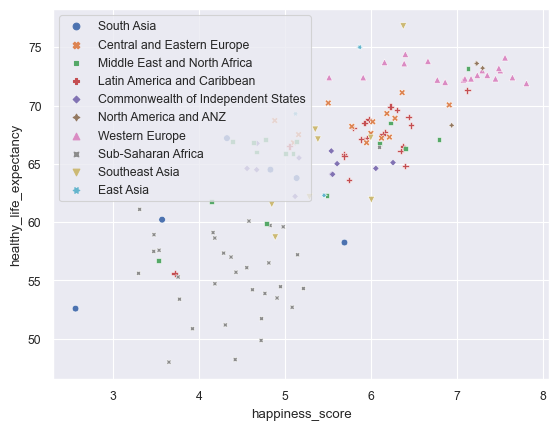

In [192]:
# Write your code here
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.set_style("dark")
sns.set_context("paper")
sns.scatterplot(data=country_features, x="happiness_score", y="healthy_life_expectancy", hue="world_region", style="world_region")
plt.grid()
plt.legend(loc='upper left')


Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.